In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [18]:
def firstNode(state: AgentState) -> AgentState:
    state["final"] = f'hey {state["name"]}!'
    return state

def secondNode(state: AgentState) -> AgentState:
    state["final"] = state["final"] + f' your age is {state["age"]}.'
    return state

In [20]:
graph = StateGraph(AgentState)
graph.add_node("first",firstNode)
graph.add_node("second",secondNode)

graph.set_entry_point("first")
graph.add_edge("first", "second")
graph.set_finish_point("second")
app = graph.compile()

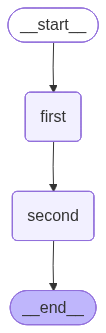

In [21]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result = app.invoke({"name":"Alice","age":"30"})
print(result)

{'name': 'Alice', 'age': '30', 'final': 'hey Alice! your age is 30.'}
